In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ipywidgets import widgets
import ConfigReader as cr

In [255]:
import itertools as itt

In [256]:
markers = itt.cycle(['o', 's', '^', '*'])

In [267]:
next(markers)

'^'

In [76]:
#Styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.rc('text', usetex=False)
plt.rc('font', size=20.0, family='serif')

In [91]:
reload(cr)

<module 'ConfigReader' from 'ConfigReader.py'>

In [246]:
datasets = ['evita','flora','helena','tania','yolanda']

In [278]:
# Data location
basedata_dir = '/mhome/mendozah/gputrack_extension'
dir_to_save = '/home/mendozah/workspace/gputrack_AutoML/trajectory_plots/'
markers = itt.cycle(['o', 'v', '^', '8', 's', 'p', 'h', 'D'])
reader = cr.ConfigReader(data_dir=basedata_dir)

In [284]:
for d_set in datasets:
    old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
    dataset = d_set + '_reduced_cs/' + d_set
    best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
    df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
    df_set = df_set.sort_values(by='cpu_time')
    
    fig_set = plt.figure(1, figsize=(15,12))
    with sns.color_palette('Paired',12):
        axs = plt.subplot(111)
        for n,gs in df_set.groupby('run'):
            axs.plot(gs.cpu_time, gs.performance, '-',label=n, marker=next(markers), ms=12, mew=1.5, mec='black')
        axs.set_title("Trajectory Performance " + d_set +" Dataset")
        axs.hlines(best_perf_set, 10**2, df_set.cpu_time.max(), linestyles='--', label='Best Config 24.04')
        # axs.set_xscale("log")
        axs.set_xlabel("Time [s]")
        axs.set_ylabel("Performance (X-Val Error)")
        axs.set_xlim(10**2, )
        axs.set_ylim(df_set.performance.min()-0.01, min(1.0,df_set.performance.max()))
        axs.legend(ncol=2)
    plt.tight_layout()
    fig_set.savefig(dir_to_save + d_set +'_compare.png')
    fig_set.clf()

In [286]:
from scipy.stats import sem

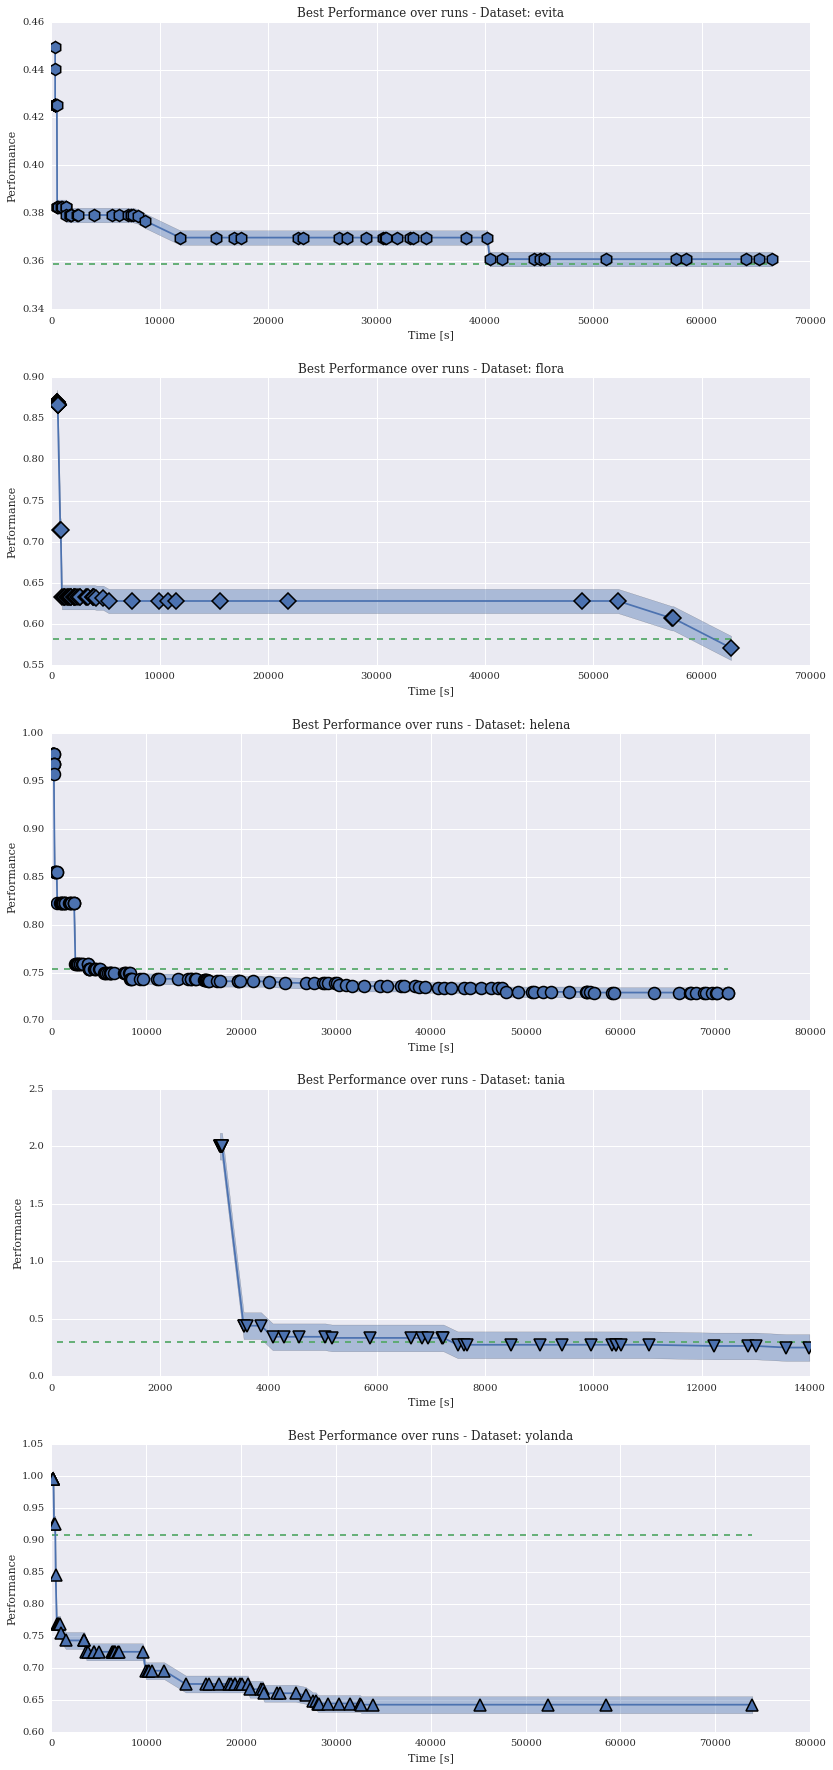

In [294]:
fig_mean, ax_mean = plt.subplots(nrows=len(datasets), figsize=(12.,25.))
for d_set, ax in zip(datasets, ax_mean.flat):
    old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
    dataset = d_set + '_reduced_cs/' + d_set
    best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
    df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
    df_set = df_set.sort_values(by='cpu_time')

    expand_min = pd.expanding_min(df_set.performance)
    ax.plot(df_set.cpu_time, expand_min, marker=next(markers), ms=12, mew=1.54, mec='black')
    q1_min = expand_min - expand_min.sem()
    q3_min = expand_min + expand_min.sem()
    ax.fill_between(df_set.cpu_time, q1_min, q3_min, alpha=0.4)
    ax.hlines(best_perf_set, 10**2, df_set.cpu_time.max(), linestyles='--', label='Best Performance 24.04', color='g')
    ax.set_ylabel('Performance')
    ax.set_xlabel('Time [s]')
    ax.set_title('Best Performance over runs - Dataset: ' + d_set)
plt.tight_layout()